# Hands-On 6

1. Implement both versions of quicksort (random and non-random choice for the pivot) and share the GitHub repository with your source code.

2.  For the non-random pivot version of quicksort show the following benchmarks on the same graph:

    2a) best case (generate a set of inputs that will always be the best case, repeat for multiple array input sizes "n").

    2b) worst case (generate a set of inputs that will always be the worst case, repeat for multiple array input sizes "n").

    2c) average case (generate a set of inputs from a uniform distribution, repeat for multiple array input sizes "n").

3. Mathematically derive the average runtime complexity of the non-random pivot version of quicksort.

In [7]:
# Non random
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr)//2]  # Choose the middle element as the pivot
        less_than_pivot = [x for x in arr if x < pivot]
        greater_than_pivot = [x for x in arr if x > pivot]
        return quicksort(less_than_pivot) + [pivot] + quicksort(greater_than_pivot)

# Example usage
arr = [10, 80, 30, 90, 40, 50, 70]
sorted_arr = quicksort(arr)
print("Sorted array (non-random pivot):", sorted_arr)


Sorted array (non-random pivot): [10, 30, 40, 50, 70, 80, 90]


In [8]:
# Random
import random

def quicksort_random(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot_index = random.randint(0, len(arr) - 1)  # Choose a random index as the pivot
        pivot = arr[pivot_index]
        less_than_pivot = [x for x in arr[:pivot_index] + arr[pivot_index+1:] if x <= pivot]
        greater_than_pivot = [x for x in arr[:pivot_index] + arr[pivot_index+1:] if x > pivot]
        return quicksort_random(less_than_pivot) + [pivot] + quicksort_random(greater_than_pivot)

# Example usage
arr = [10, 80, 30, 90, 40, 50, 70]
sorted_arr_random = quicksort_random(arr)
print("Sorted array (random pivot):", sorted_arr_random)


Sorted array (random pivot): [10, 30, 40, 50, 70, 80, 90]


Text(0, 0.5, 'Time')

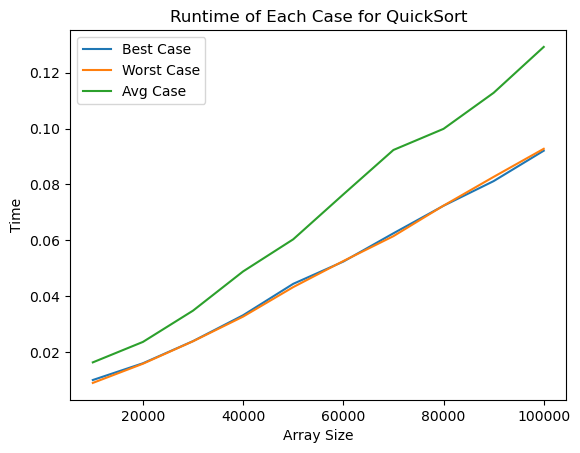

In [22]:
# For non-random pivot version of quicksort, 
# the best case is when the array is already sorted,
# the worst case is when the pivot is the smallest/largest
from random import randint
from time import time
import matplotlib.pyplot as plt

totalTimeBest=[]
totalTimeWorst=[]
totalTimeAvg=[]
sizes=[i for i in range(10000, 110000, 10000)]
for size in sizes:
    arr=[randint(0, 1000000) for _ in range(size)]
    arrBest=sorted(arr) # Pre sort the array
    arrWorst=arrBest # Pre sort the array for worst case
    arrWorst[size-1], arrWorst[size//2]=arrWorst[size//2], arrWorst[size-1]
    # Avg
    timestart=time()
    quicksort(arr)
    timeend=time()
    totalTimeAvg.append(timeend-timestart)
    # Best
    timestart=time()
    quicksort(arrBest)
    timeend=time()
    totalTimeBest.append(timeend-timestart)
    # Worst
    timestart=time()
    quicksort(arrWorst)
    timeend=time()
    totalTimeWorst.append(timeend-timestart)

plt.plot(sizes, totalTimeBest, label='Best Case')
plt.plot(sizes, totalTimeWorst, label='Worst Case')
plt.plot(sizes, totalTimeAvg, label='Avg Case')
plt.legend()
plt.title('Runtime of Each Case for QuickSort')
plt.xlabel('Array Size')
plt.ylabel('Time')

For the mathmatical derivation of the non-random version of quicksort, there is 

$$T(n)=2T(n/2)+n$$

Using Master Theorem, $a=2$, $b=2$, $d=1$, $T(n)=n^d \log n=n \log n$